In [27]:
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import os
import json
from matplotlib import pyplot as plt
import upsetplot as usp

In [38]:
# load the config files and the variables from the upset_plot-section of the config file
config_path = "/home/reinhold/Daten/OPEN_3ds/generated_config"
config_filename = "config_viz.json"
f = open(os.path.join(config_path, config_filename))
IO_json = json.load(f)

###############################################################################
## switch between the two different variables
###############################################################################
#var = "per_pm_id"
var = "per_pm_id_date"
root_data_dir_name = IO_json["root_data_dir_name"]
input = IO_json["summary_plots"]["input"][var]
dataset_labels = IO_json["summary_plots"]["dataset_labels"]
output = IO_json["summary_plots"]["upsetplot_output"][var]

cols = []
for ds in dataset_labels:
    cols.append(ds)
print(cols)

['OpenAPS (NS)', 'OPENonOH (NS)', 'OPENonOH (AAPS_Uploader)']


In [39]:

df = pd.read_csv(os.path.join(root_data_dir_name, input[0], input[1]), header=0, parse_dates=[1], index_col=0)
for i in range(3):
    df[cols[i]] = ~pd.isna(df[f"pm_id_{i}"])

df1 = df[cols]


In [40]:

df2 = usp.from_indicators(df1)
print(df2)


OpenAPS (NS)  OPENonOH (NS)  OPENonOH (AAPS_Uploader)
True          False          False                       1.0
                             False                       1.0
                             False                       1.0
                             False                       1.0
                             False                       1.0
                                                        ... 
False         False          True                        1.0
                             True                        1.0
                             True                        1.0
                             True                        1.0
                             True                        1.0
Name: ones, Length: 56962, dtype: float64


created image: /home/reinhold/Daten/OPEN_3ds/img/upsetplot_per_pm_id_date.png


<Figure size 1080x1080 with 0 Axes>

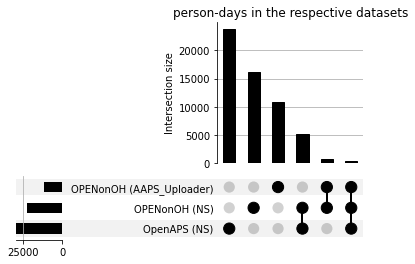

In [41]:
os.makedirs(os.path.join(root_data_dir_name, output[0]), exist_ok=True)
plt.rcParams["font.size"] = 10.0
plt.rcParams.update({"figure.facecolor" : (1.0, 1.0, 1.0, 1.0), "savefig.facecolor": (1.0, 1.0, 1.0, 1.0)})
plt.figure(figsize=(15,15))
plt.tight_layout()
usp.plot(df2, subset_size='count')
plt.title(output[2])
plt.savefig(os.path.join(root_data_dir_name, output[0], output[1]), bbox_inches='tight')
print(f"created image: {os.path.join(root_data_dir_name, output[0], output[1])}")



In [42]:
# upset = usp.UpSet(df2, subset_size='count', intersection_plot_elements=3)
# upset.plot()
#upset.add_catplot(value='median_value', kind='strip', color='blue')
#upset.add_catplot(value='AGE', kind='strip', color='black')


In [43]:
# for venn3 diagramm
output = IO_json["summary_plots"]["venn3plot_output"][var]
df_v1 = df2.groupby(cols, dropna=False).agg("count")
print(df_v1)
#print(type(df_v1))
#df_v1.info()


OpenAPS (NS)  OPENonOH (NS)  OPENonOH (AAPS_Uploader)
False         False          True                        10915
              True           False                       16137
                             True                          648
True          False          False                       23782
              True           False                        5115
                             True                          365
Name: ones, dtype: int64


(False, False, True) 10915
(False, True, False) 16137
(False, True, True) 648
(True, False, False) 23782
(True, True, False) 5115
(True, True, True) 365
created image: /home/reinhold/Daten/OPEN_3ds/img/venn3plot_per_pm_id_date.png


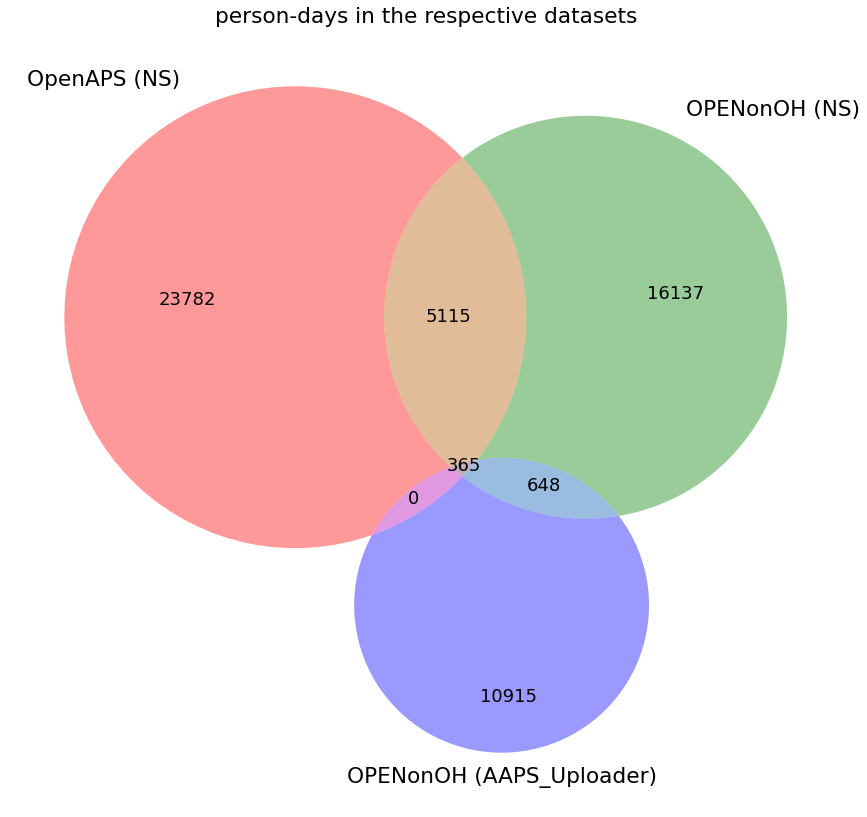

In [44]:
#print(df_v1.index)
#print(df_v1.index.names)
plt.rcParams["font.size"] = 18.0  # 10 by default
data = {}
for i in df_v1.index:
    print(i, df_v1.loc[i])
    i_str = "".join([str(int(i_k)) for i_k in i])
    data[i_str] = df_v1.loc[i]

plt.figure(figsize=(15,15))
plt.tight_layout()
venn3(subsets = data, set_labels=df_v1.index.names)
plt.title(output[2])
plt.savefig(os.path.join(root_data_dir_name, output[0], output[1]), bbox_inches='tight')
print(f"created image: {os.path.join(root_data_dir_name, output[0], output[1])}")

#venn3(subsets = (data["100"], data["010"], data["110"], data["001"], data["101"], data["011"], data["111"]), set_labels=("OPENonOH", "OpenAPS_NS", "OPENonOH_AAPS_Uploader"), alpha=0.5)

In [45]:
# just for cross check: should return an empty dataframe for the artificial data, a dataframe with all true for the real data
df4 = df1[(df1[cols[0]]==True) & (df1[cols[1]]==True) & (df1[cols[2]]==True)]
print(df4)

       OpenAPS (NS)  OPENonOH (NS)  OPENonOH (AAPS_Uploader)
8287           True           True                      True
8288           True           True                      True
8289           True           True                      True
8290           True           True                      True
8291           True           True                      True
...             ...            ...                       ...
26098          True           True                      True
26099          True           True                      True
26100          True           True                      True
26101          True           True                      True
26102          True           True                      True

[365 rows x 3 columns]
